In [1]:
%reload_ext XTIPython

You can now access BridgeLib, ImarisLib, vImaris, vDataSet, vScene and vFactory


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
# I will use the marching cubes from measure as per:
# https://stackoverflow.com/questions/6030098/how-to-display-a-3d-plot-of-a-3d-array-isosurface-in-matplotlib-mplot3d-or-simil

from skimage import measure
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import numpy as np

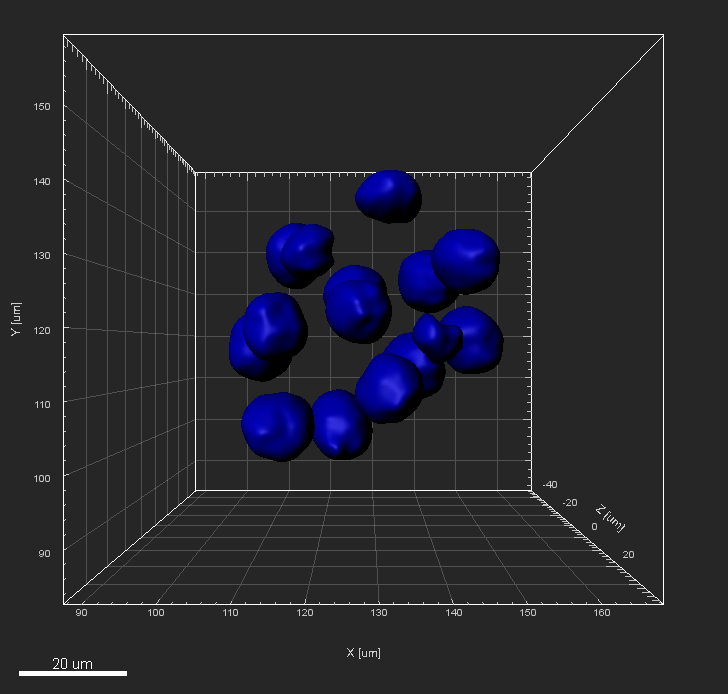

In [4]:
%imaris_screenshot

In [5]:
%imaris_pull surfaces

['Surfaces 2', 'Surfaces 1']

In [6]:
s = surfaces['Surfaces 2']

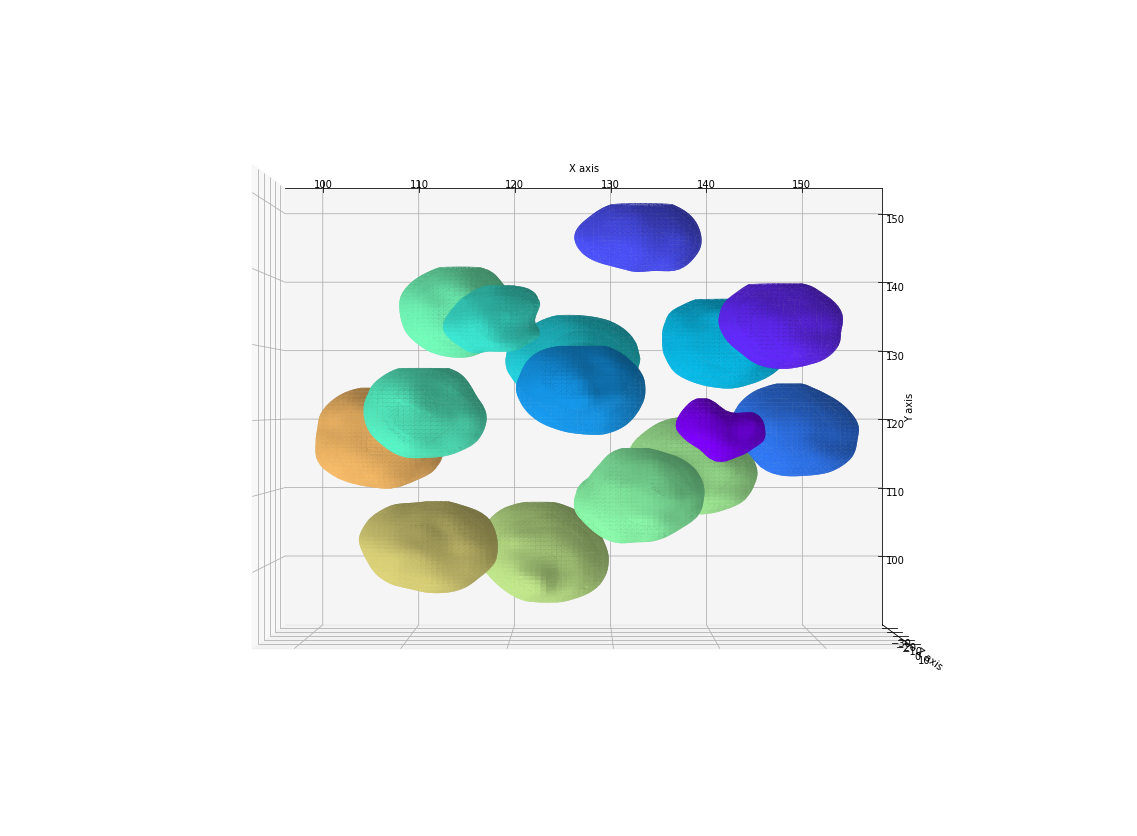

In [7]:
from matplotlib.pyplot import cm

# As per https://stackoverflow.com/questions/4971269/how-to-pick-a-new-color-for-each-plotted-line-within-a-figure-in-matplotlib
color=iter(cm.rainbow(np.linspace(0,1,20)))

# New figure and new 3-D subplot
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111, projection='3d')

nSurfaces = len(s.GetIds())
for i in range(nSurfaces):
    #print("Processing surface %d/%d"%(i+1,nSurfaces))
    sl = s.GetSurfaceDataLayout(i)
    
    #inverting Y to have the same orientation as in Imaris
    arr = np.swapaxes(np.array(s.GetSurfaceData(i).GetDataShorts())[0,0,...],0,2)[:,:-1,:]
    
    vx = (sl.mExtendMaxX-sl.mExtendMinX)/(sl.mSizeX-1)
    vy = (sl.mExtendMaxY-sl.mExtendMinY)/(sl.mSizeY-1)
    vz = (sl.mExtendMaxZ-sl.mExtendMinZ)/(sl.mSizeZ-1)

    verts, faces, normals, values = measure.marching_cubes_lewiner(arr, 0, spacing=(vz, vy, vx))
    c = next(color)
    
    ax.plot_trisurf(verts[:, 2]+sl.mExtendMinX, verts[:,1]+sl.mExtendMinY, faces, verts[:, 0]+sl.mExtendMinZ,
                color=c,lw=1)

#Same orientation as Imaris reset view
ax.view_init(90, -90)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

plt.show()    

# GetSurfaceDataLayout()

Returns the layout of the surface, that is the : public and the size of the return value of GetData().

!! Due to the sub-pixel resolution of the surfaces, the actual minimum and maximum coordinates of the vertices of the triangulated representation of the surface are typically included and not equal to the : public of the layout !!

In [ ]:
sl = s.GetSurfaceDataLayout(0)
print(sl)

# GetSurfaceData()

Returns a dataset of type UInt16 containing signed int16 values. Values below zero are outside the surface, above zero is inside. A sub-voxel precise surface can be reconstructed by linearly interpolating the values around zero.

!! data values are placed on the border as well, voxel size is (mExtendMax - mExtendMin) / (mSize - 1) !!

In [ ]:
arr = np.swapaxes(np.array(s.GetSurfaceData(0).GetDataShorts())[0,0,...],0,2)
print(arr.shape)
vx = (sl.mExtendMaxX-sl.mExtendMinX)/(sl.mSizeX-1)
vy = (sl.mExtendMaxY-sl.mExtendMinY)/(sl.mSizeY-1)
vz = (sl.mExtendMaxZ-sl.mExtendMinZ)/(sl.mSizeZ-1)
print(vx,vy,vz)

# GetSurfaceNormals()

3 channels image of type uint8 treated as signed in the range [-127, 127] for symmetry.

!! data values are placed on the border as well, voxel size is (mExtendMax - mExtendMin) / (mSize - 1) !!

In [ ]:
normals = np.swapaxes(np.array(s.GetSurfaceNormals(0).GetDataShorts())[0,0,...],0,2)
print(normals.shape)

In [ ]:
verts, faces, normals, values = measure.marching_cubes_lewiner(arr, 0, spacing=(vz, vy, vx))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(verts[:, 2]+sl.mExtendMinX, verts[:,1]+sl.mExtendMinY, faces, verts[:, 0]+sl.mExtendMinZ,
                lw=1, 
                antialiased=True)
plt.show()